In [1]:
import torch

In [2]:
import cv2

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# IMPORT IMAGE

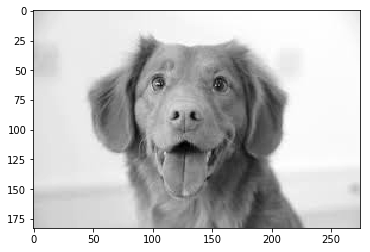

In [7]:
img_path = '/home/pongsasit/Documents/dog1.jpeg'

#load color image
bgr_img = cv2.imread(img_path)
#convert to greyscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

#normalize and rescale to lie in [0,1]
gray_img = gray_img.astype("float32")/255

#plot image
plt.imshow(gray_img, cmap = 'gray')
plt.show()

In [ ]:
#DEFINE filters
#VISUALIZE filters

In [8]:
import numpy as np

filter_vals = np.array([[-1,-1,1,1],[1,1,1,-1],[-1,1,-1,1],[-1,-1,1,1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [9]:
#Define filters
filter_1 = filter_vals
filter_2 = -filter_1

#.T  is transpose
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print('Filter 1: \n', filter_1)
print('Filter 3: \n', filter_3)

Filter 1: 
 [[-1 -1  1  1]
 [ 1  1  1 -1]
 [-1  1 -1  1]
 [-1 -1  1  1]]
Filter 3: 
 [[-1  1 -1 -1]
 [-1  1  1 -1]
 [ 1  1 -1  1]
 [ 1 -1  1  1]]


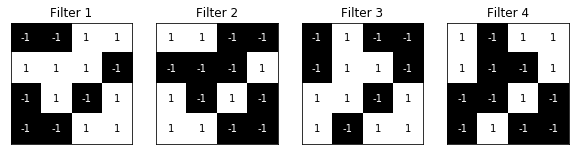

In [10]:
#Visualize all four fliters
fig = plt.figure(figsize=(10,5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='white' if filters[i][x][y]<0 else 'black')
            

In [12]:
#Define convolutional layer
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        #initializes the weights of conv layer tobe the 4defined filters
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height,k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
    def forward(self, x):
        #calculate output
        conv_x =self.conv(x)
        activated_x = F.relu(conv_x)
        
        return conv_x, activated_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [ ]:
#Visualize the output of each filter

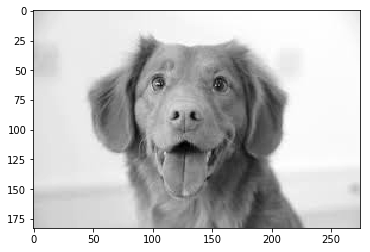

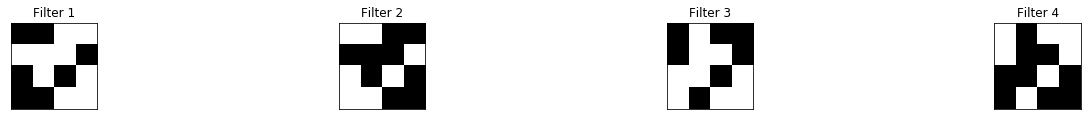

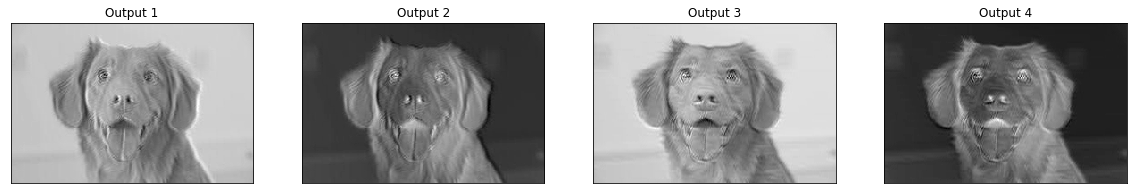

In [14]:
#plot original image
plt.imshow(gray_img,cmap='gray')

#visualize all filters
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
#convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

#get the conv layer(pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

#visualize the output of conv layer
def viz_layer(layer, n_filters=4):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        #grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))
        
viz_layer(conv_layer)

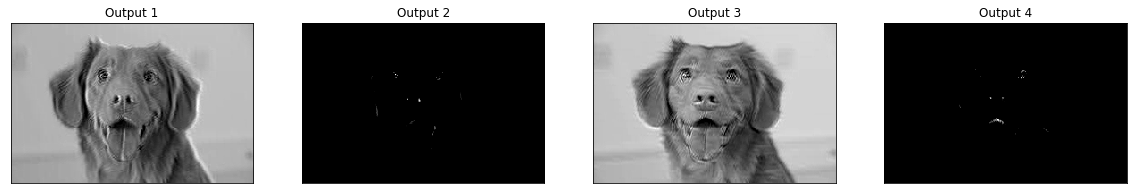

In [16]:
#Activation function Relu make all negative pixel value in 0 (black)
viz_layer(activated_layer)

In [ ]:
#Define conv and pooling

In [17]:
#Define convolutional layer and pooling
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        #initializes the weights of conv layer tobe the 4defined filters
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height,k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.pool = nn.MaxPool2d(2,2)
        
    def forward(self, x):
        #calculate output
        conv_x =self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
    
        return conv_x, activated_x, pooled_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


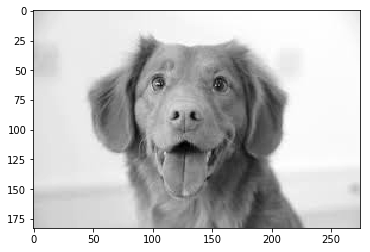

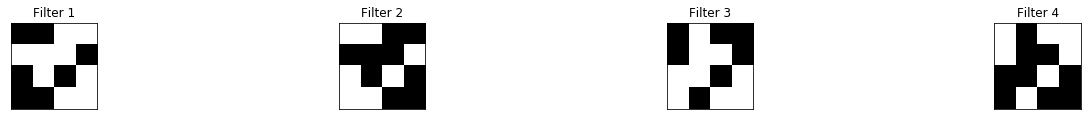

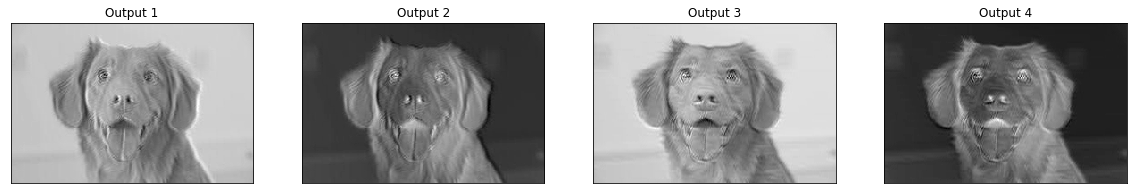

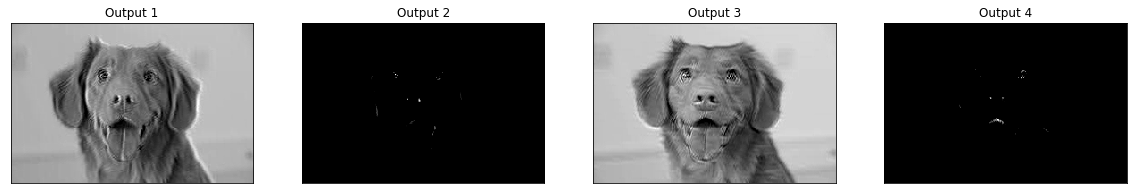

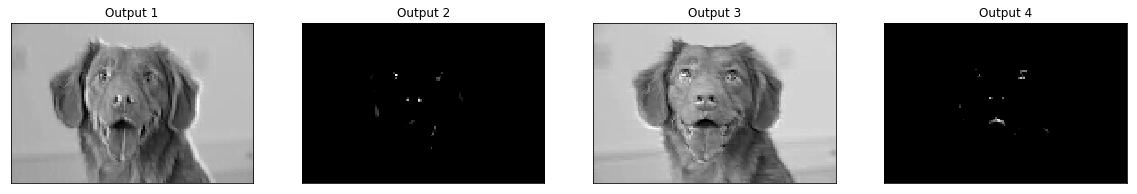

In [20]:
#plot original image
plt.imshow(gray_img,cmap='gray')

#visualize all filters
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
#convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

#get the conv layer(pre and post activation)
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

#visualize the output of conv layer
def viz_layer(layer, n_filters=4):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        #grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))
        
viz_layer(conv_layer)
viz_layer(activated_layer)
#constructing a new, smaller image of only the maximum (brightest) values 
#in a given kernel area.

viz_layer(pooled_layer)